## Problem Statement
To predict the satisfaction level of customers of an Airline using different Classifiers

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
df1 = pd.read_csv('airline_train.csv')
print(df1.shape)
df1.head()

(103904, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df2 = pd.read_csv('airline_test.csv')
print(df2.shape)
df2.head()

(25976, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [5]:
df1.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

### Data Preprocessing

#### Handling null and duplicate values

In [6]:
nv = df1.isnull().sum()
nv = nv[nv>0]
print(nv)

Arrival Delay in Minutes    310
dtype: int64


In [7]:
nv = df2.isnull().sum()
nv = nv[nv>0]
print(nv)

Arrival Delay in Minutes    83
dtype: int64


In [8]:
df1.duplicated().sum()

0

In [9]:
df2.duplicated().sum()

0

In [10]:
df1.dropna(inplace=True)

In [11]:
df2.dropna(inplace=True)

In [12]:
nv = df1.isnull().sum()
nv = nv[nv>0]
print(nv)
df1.shape

Series([], dtype: int64)


(103594, 25)

In [13]:
nv = df2.isnull().sum()
nv = nv[nv>0]
print(nv)
df2.shape

Series([], dtype: int64)


(25893, 25)

In [14]:
df1.drop(['Unnamed: 0'], axis=1, inplace=True)

In [15]:
df2.drop(['Unnamed: 0'], axis=1, inplace=True)

In [16]:
df2.head(2)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied


#### Checking datatypes of columns

In [17]:
df1.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [18]:
df2.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [19]:
num_cols_df1 = df1.dtypes[df1.dtypes!='object'].index
cat_cols_df1 = df1.dtypes[df1.dtypes=='object'].index
print('num_cols_df1:\n',num_cols_df1)
print('cat_cols_df1:\n',cat_cols_df1)

num_cols_df1:
 Index(['id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')
cat_cols_df1:
 Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')


In [20]:
num_cols_df2 = df2.dtypes[df2.dtypes!='object'].index
cat_cols_df2 = df2.dtypes[df2.dtypes=='object'].index
print('num_cols_df2:\n',num_cols_df2)
print('cat_cols_df2:\n',cat_cols_df2)

num_cols_df2:
 Index(['id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')
cat_cols_df2:
 Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')


### EDA

In [21]:
for i in num_cols_df1:
    print(f'Feature name:{i}')
    print(df1[i].value_counts())
    print('*'*20)

Feature name:id
70172     1
18481     1
26801     1
6259      1
17470     1
         ..
24497     1
87602     1
18956     1
118876    1
62567     1
Name: id, Length: 103594, dtype: int64
********************
Feature name:Age
39    2961
25    2790
40    2569
44    2479
42    2453
      ... 
74      47
76      45
79      42
78      33
85      17
Name: Age, Length: 75, dtype: int64
********************
Feature name:Flight Distance
337     659
594     395
404     391
862     368
2475    367
       ... 
76        1
1305      1
877       1
732       1
400       1
Name: Flight Distance, Length: 3802, dtype: int64
********************
Feature name:Inflight wifi service
3    25789
2    25755
4    19737
1    17781
5    11436
0     3096
Name: Inflight wifi service, dtype: int64
********************
Feature name:Departure/Arrival time convenient
4    25474
5    22333
3    17903
2    17142
1    15452
0     5290
Name: Departure/Arrival time convenient, dtype: int64
********************
Feature name:

#### inference:
1. Age, Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes are continuous
2. Rest all the numerical columns are categorical with int datatype

In [22]:
for i in cat_cols_df1:
    print(f'Feature name:{i}')
    print(df1[i].value_counts())
    print('*'*20)

Feature name:Gender
Female    52576
Male      51018
Name: Gender, dtype: int64
********************
Feature name:Customer Type
Loyal Customer       84662
disloyal Customer    18932
Name: Customer Type, dtype: int64
********************
Feature name:Type of Travel
Business travel    71465
Personal Travel    32129
Name: Type of Travel, dtype: int64
********************
Feature name:Class
Business    49533
Eco         46593
Eco Plus     7468
Name: Class, dtype: int64
********************
Feature name:satisfaction
neutral or dissatisfied    58697
satisfied                  44897
Name: satisfaction, dtype: int64
********************


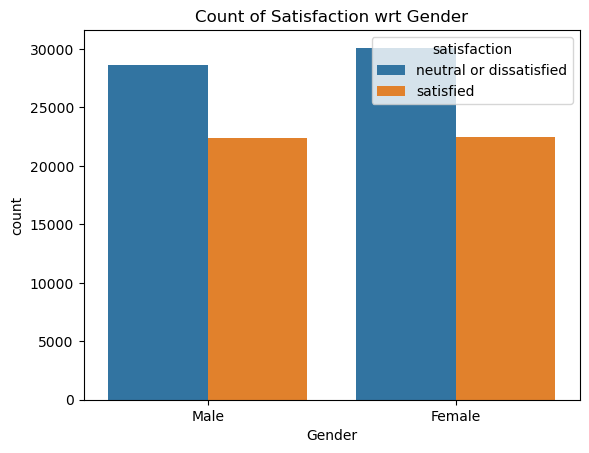

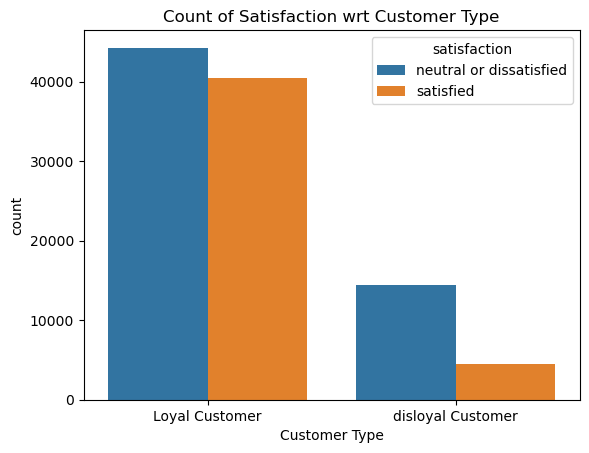

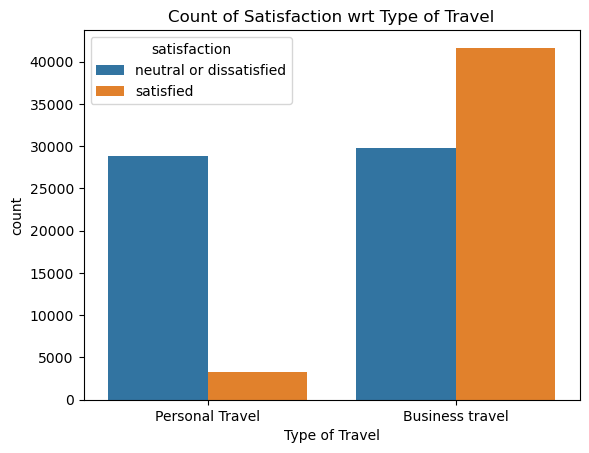

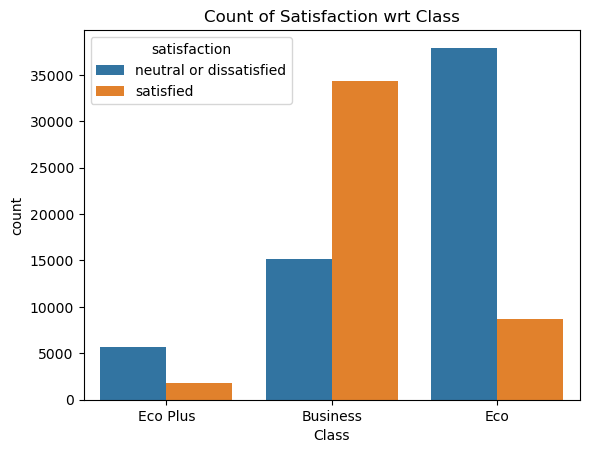

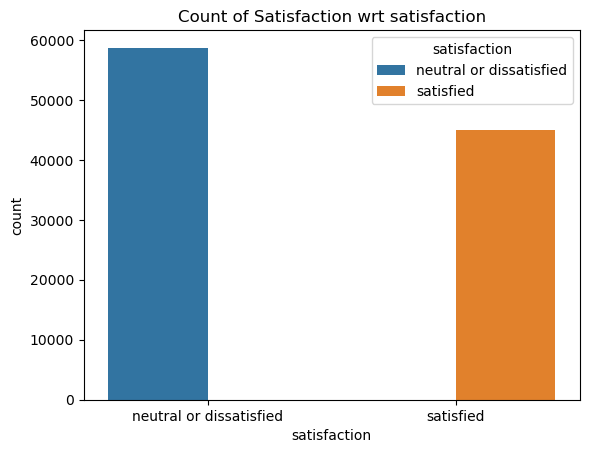

In [23]:
for i in cat_cols_df1:
    sns.countplot(x=df1[i], hue=df1['satisfaction'])
    plt.title(f'Count of Satisfaction wrt {i}')
    plt.show()

#### Label Encoding for categorical columns

In [24]:
lb = LabelEncoder()
for i in cat_cols_df1:
    df1[i] = lb.fit_transform(df1[i])

In [25]:
for i in cat_cols_df2:
    df2[i] = lb.fit_transform(df2[i])

#### Correlation

In [26]:
corr = df1.corr()

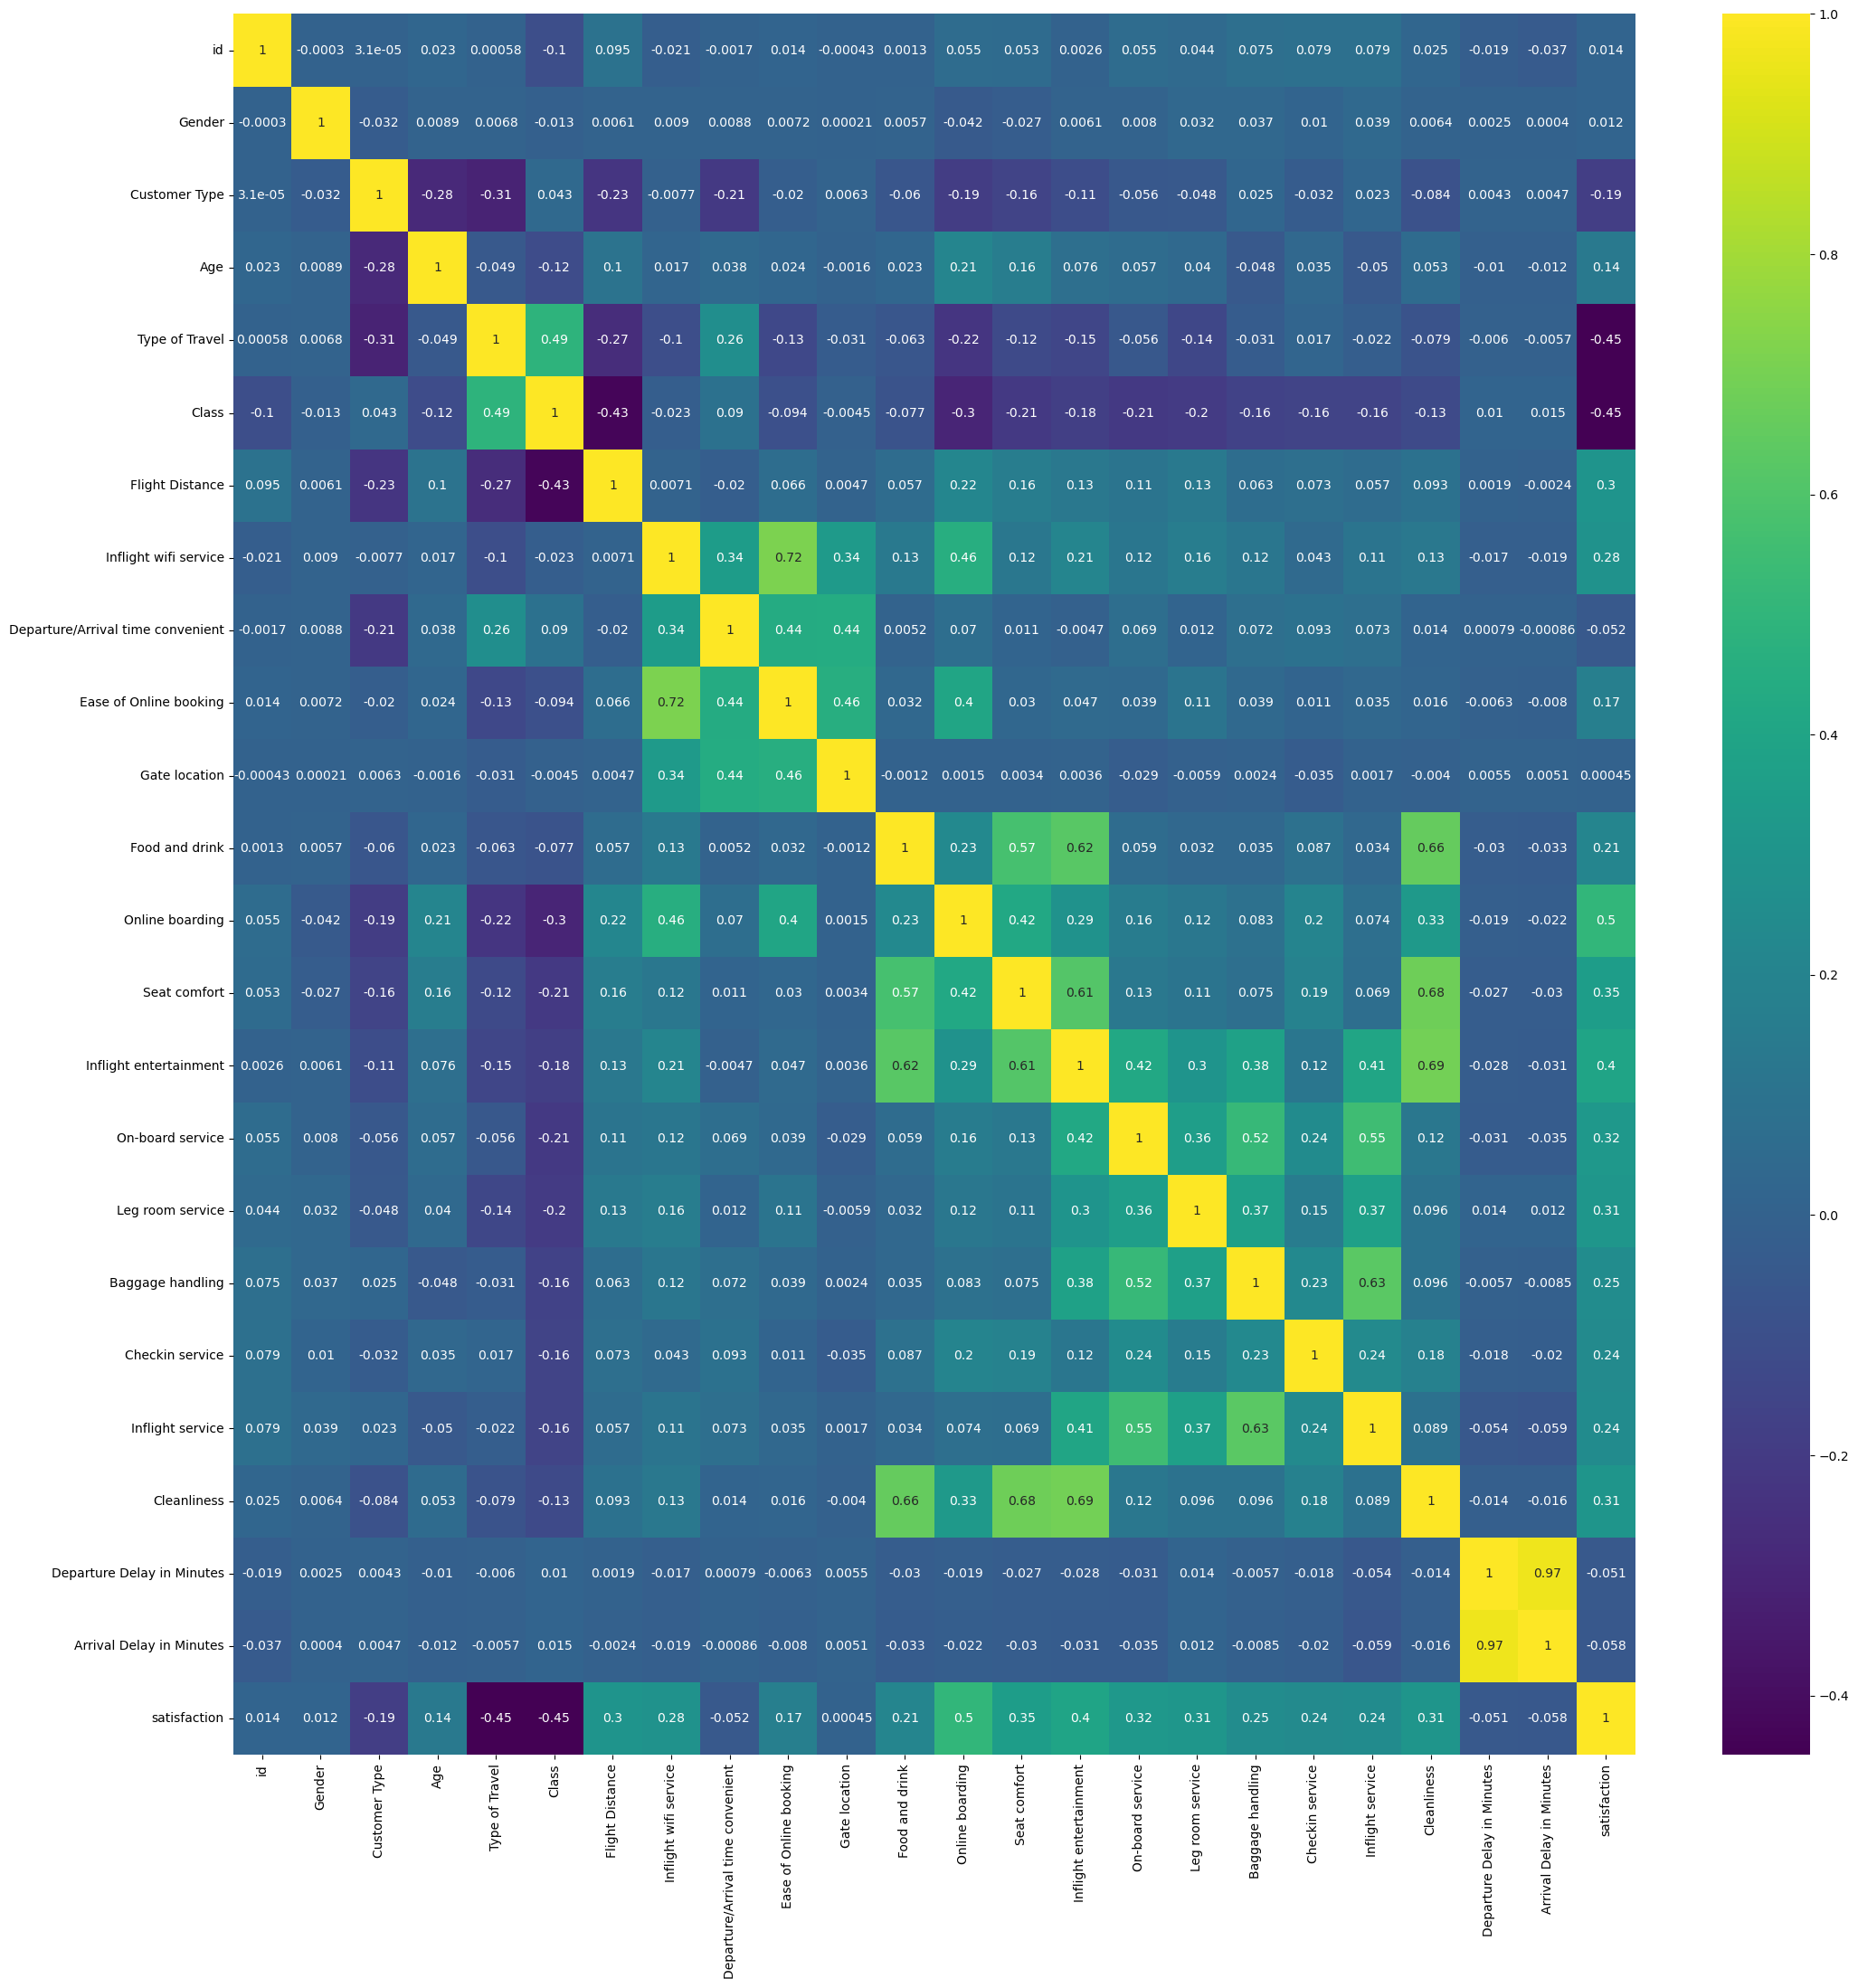

In [27]:
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

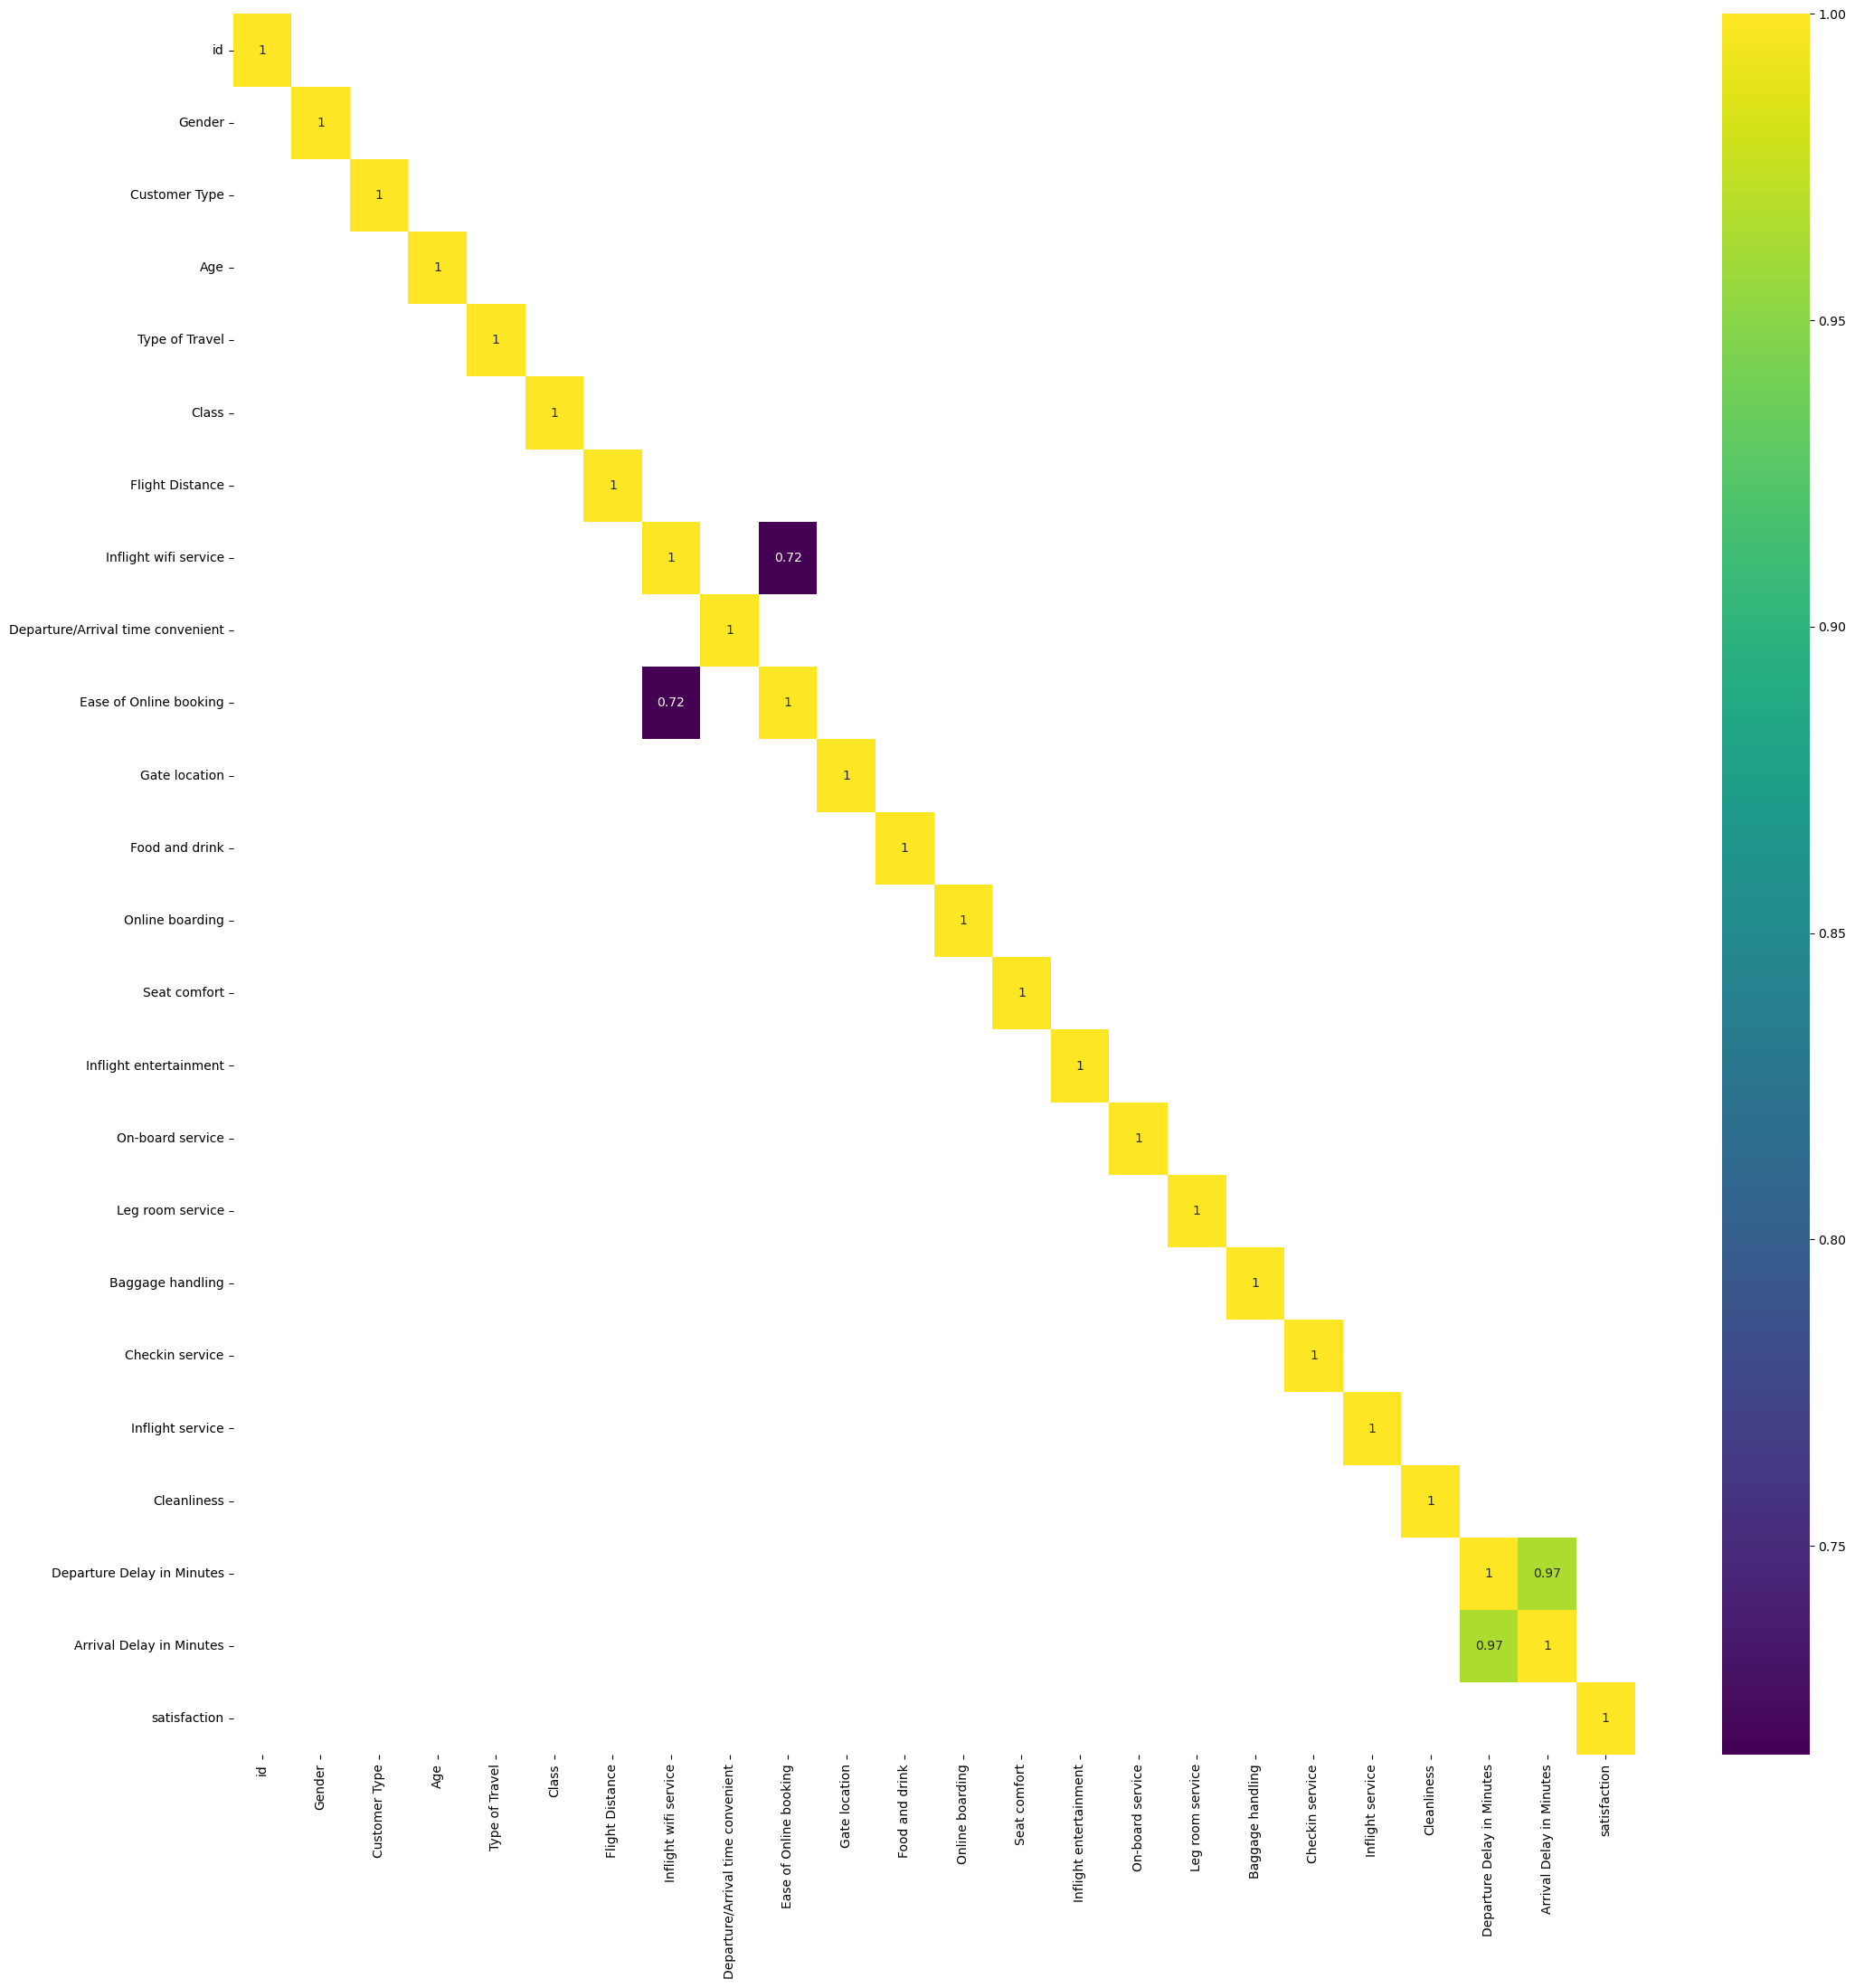

In [28]:
corr1 = corr[abs(corr)>0.7]
plt.figure(figsize=(25,25))
sns.heatmap(corr1, annot=True, cmap='viridis')
plt.show()

#### Inference:
There are no highly correlated features

#### Boxplot

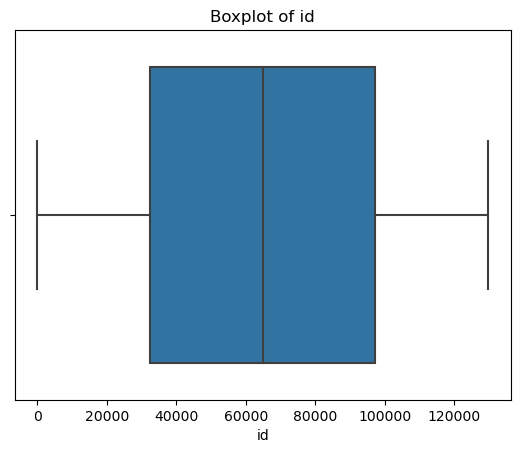

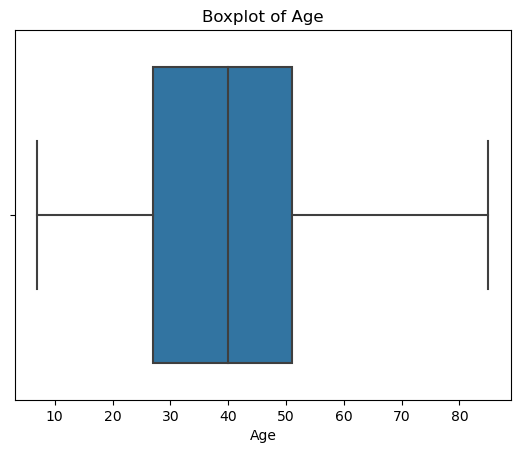

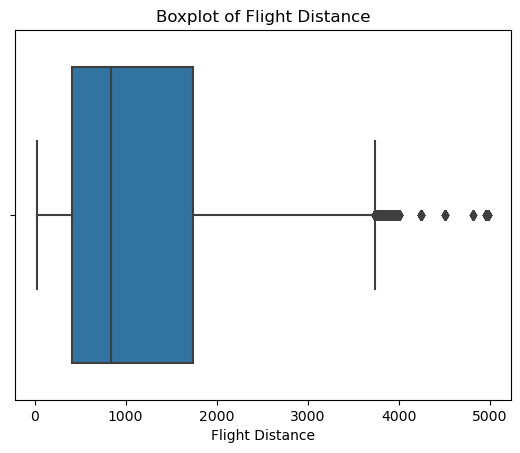

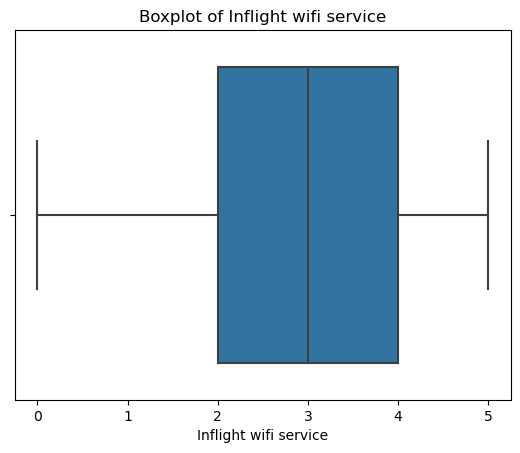

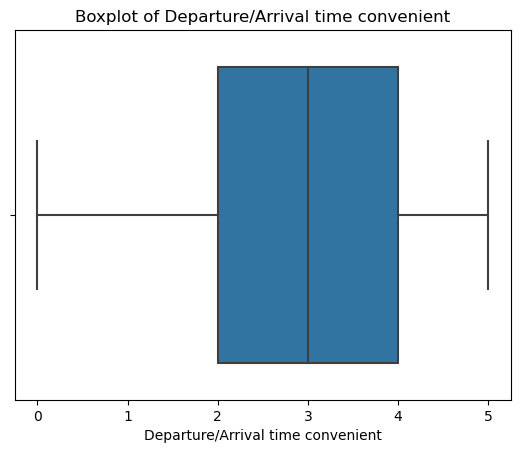

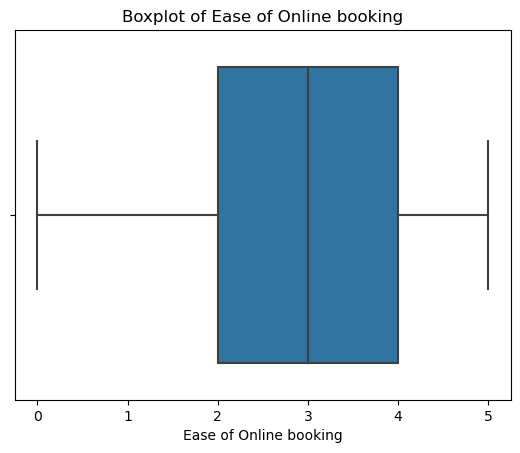

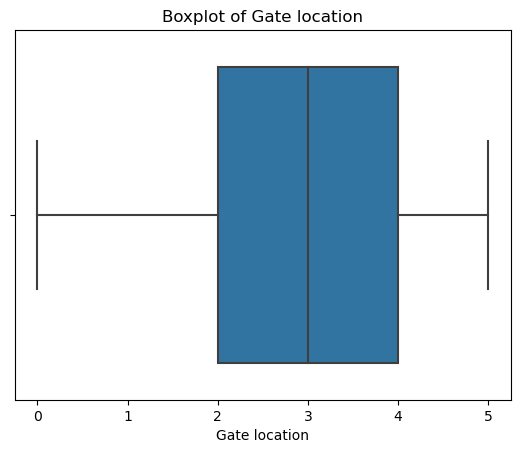

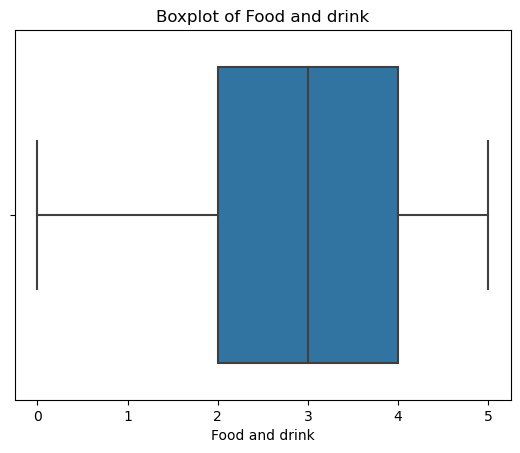

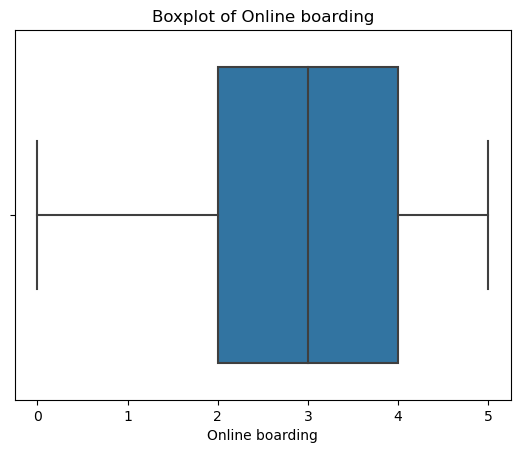

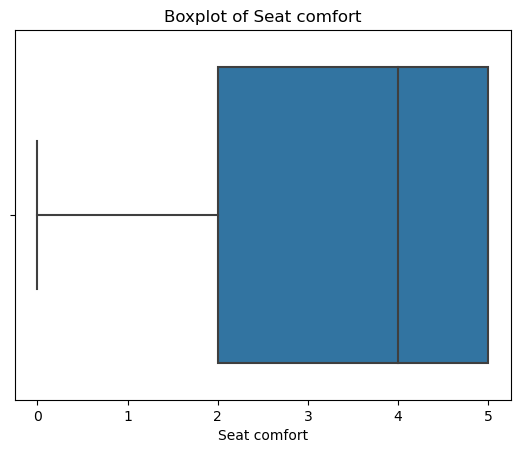

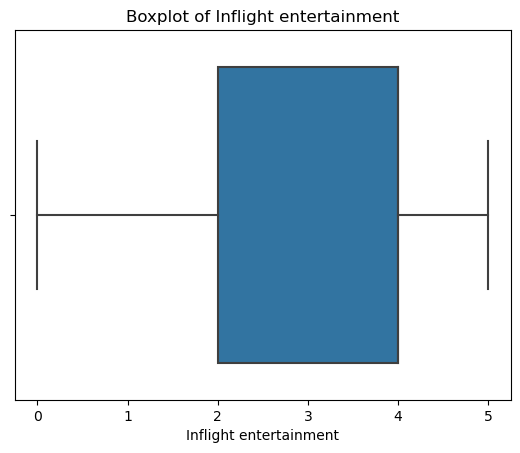

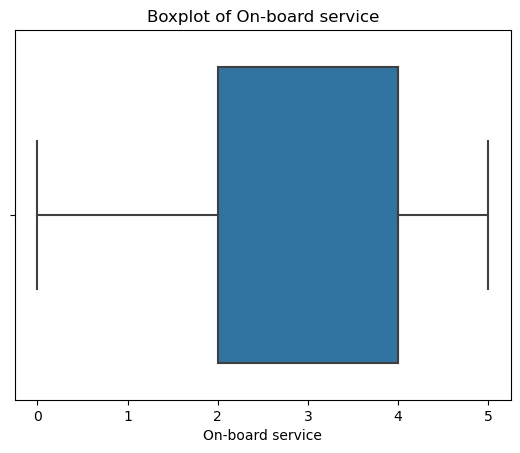

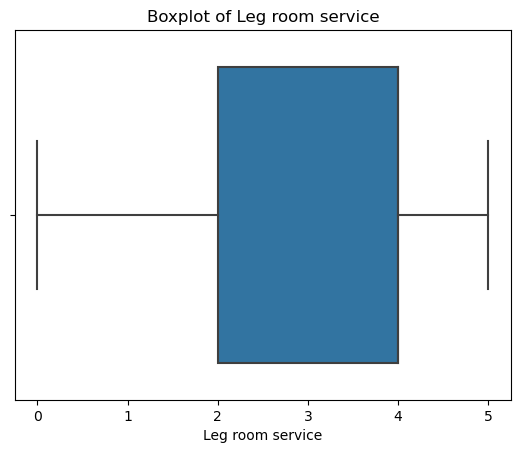

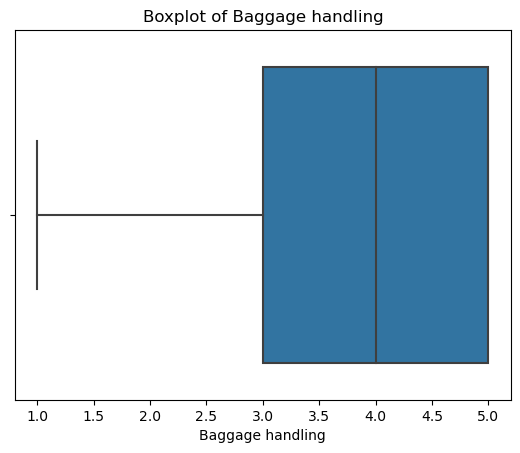

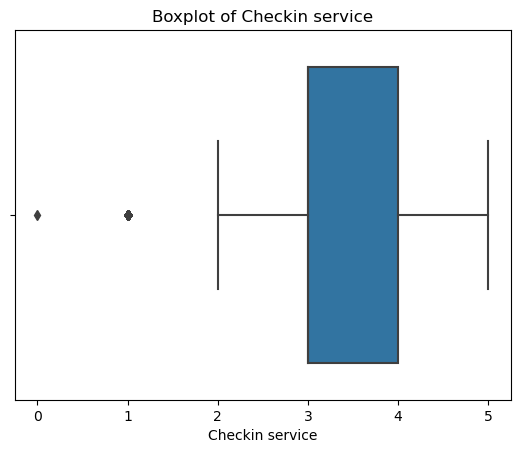

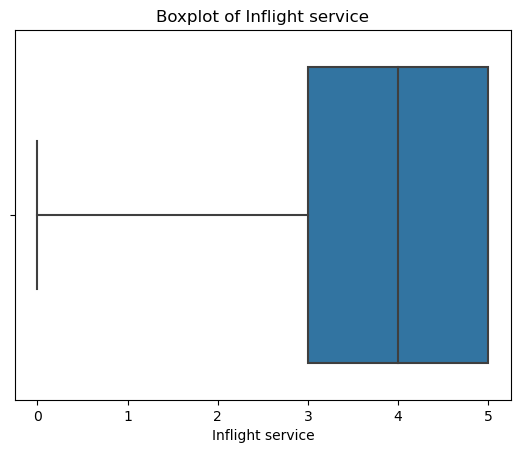

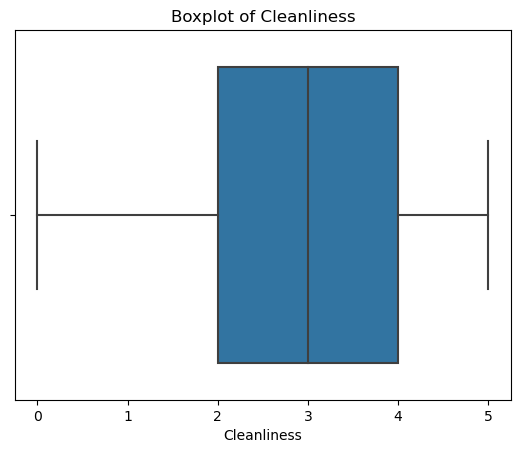

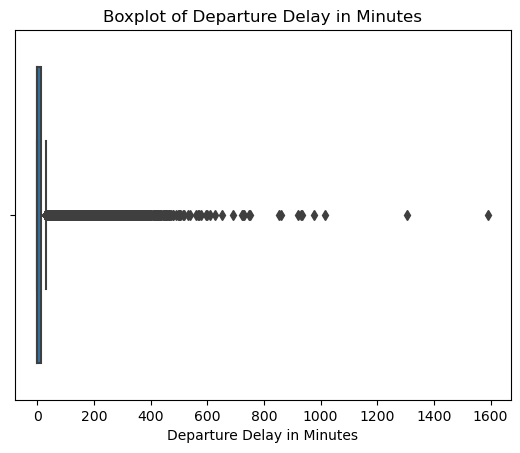

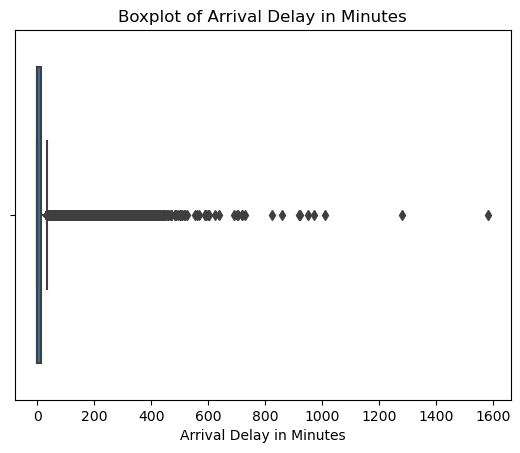

In [29]:
for i in num_cols_df1:
    sns.boxplot(x=df1[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

#### inference:
There are outliers in Flight Distance, Checkin Service, Departure Delay in minutes, Arrival Delay in minutes

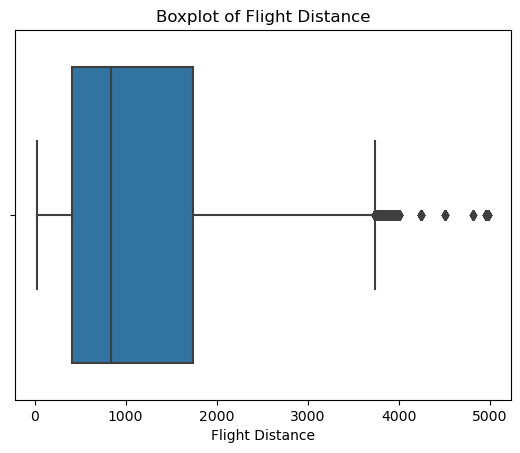

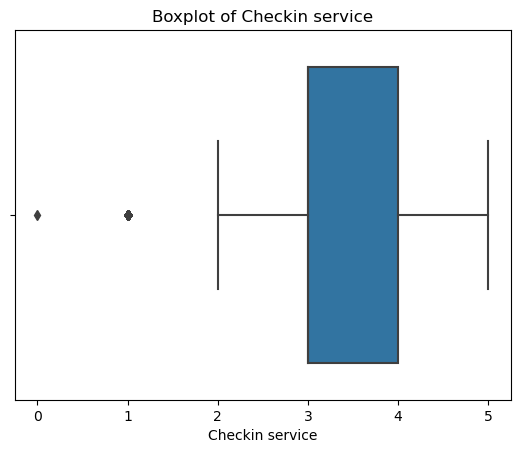

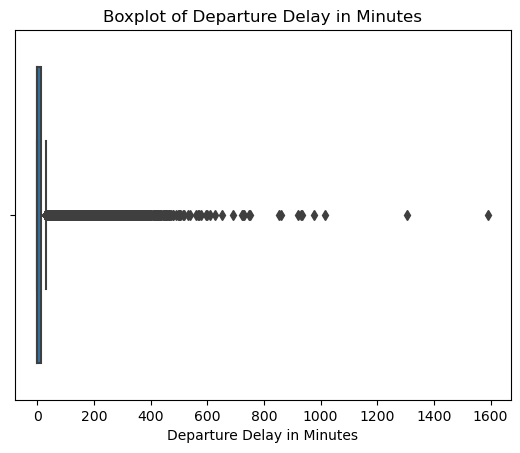

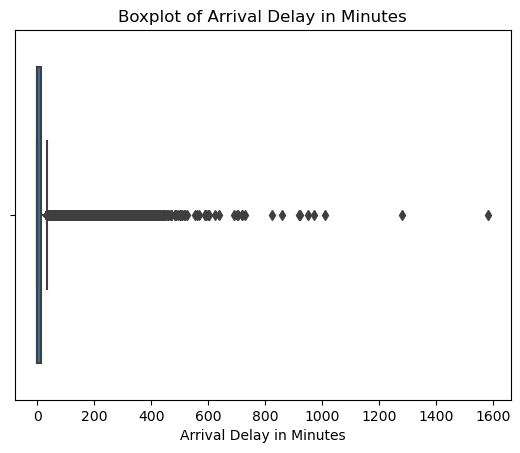

In [30]:
outlier_cols = ['Flight Distance', 'Checkin service', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
for i in outlier_cols:
    sns.boxplot(x=df1[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

In [31]:
df1.describe(percentiles=[0.01,0.02,0.03,0.04,0.05]).T

,count,mean,std,min,1%,2%,3%,4%,5%,50%,max
id,103594.0,64942.428625,37460.816597,1.0,1303.93,2612.86,3955.79,5267.72,6594.65,64890.0,129880.0
Gender,103594.0,0.492480,0.499946,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1.0
Customer Type,103594.0,0.182752,0.386465,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1.0
Age,103594.0,39.380466,15.113125,7.0,8.00,10.00,11.00,13.00,14.00,40.0,85.0
Type of Travel,103594.0,0.310143,0.462554,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1.0
Class,103594.0,0.593944,0.620771,0.0,0.00,0.00,0.00,0.00,0.00,1.0,2.0
Flight Distance,103594.0,1189.325202,997.297235,31.0,101.00,116.00,139.00,158.00,175.00,842.0,4983.0
Inflight wifi service,103594.0,2.729753,1.327866,0.0,0.00,0.00,1.00,1.00,1.00,3.0,5.0
Departure/Arrival time convenient,103594.0,3.060081,1.525233,0.0,0.00,0.00,0.00,0.00,0.00,3.0,5.0
Ease of Online booking,103594.0,2.756984,1.398934,0.0,0.00,0.00,0.00,0.00,1.00,3.0,5.0


In [32]:
df1.describe(percentiles=[0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,50%,95%,96%,97%,98%,99%,max
id,103594.0,64942.428625,37460.816597,1.0,64890.0,123412.35,124735.28,126002.21,127296.14,128584.21,129880.0
Gender,103594.0,0.492480,0.499946,0.0,0.0,1.00,1.00,1.00,1.00,1.00,1.0
Customer Type,103594.0,0.182752,0.386465,0.0,0.0,1.00,1.00,1.00,1.00,1.00,1.0
Age,103594.0,39.380466,15.113125,7.0,40.0,64.00,65.00,67.00,68.00,70.00,85.0
Type of Travel,103594.0,0.310143,0.462554,0.0,0.0,1.00,1.00,1.00,1.00,1.00,1.0
Class,103594.0,0.593944,0.620771,0.0,1.0,2.00,2.00,2.00,2.00,2.00,2.0
Flight Distance,103594.0,1189.325202,997.297235,31.0,842.0,3384.00,3510.00,3635.00,3764.00,3882.00,4983.0
Inflight wifi service,103594.0,2.729753,1.327866,0.0,3.0,5.00,5.00,5.00,5.00,5.00,5.0
Departure/Arrival time convenient,103594.0,3.060081,1.525233,0.0,3.0,5.00,5.00,5.00,5.00,5.00,5.0
Ease of Online booking,103594.0,2.756984,1.398934,0.0,3.0,5.00,5.00,5.00,5.00,5.00,5.0


In [33]:
print(df1[df1['Checkin service']<2].shape)
print(df1[df1['Flight Distance']>3882.00].shape)
print(df1[df1['Departure Delay in Minutes']>181.97].shape)
print(df1[df1['Arrival Delay in Minutes']>184.00].shape)

(12853, 24)
(1035, 24)
(1029, 24)
(1020, 24)


In [34]:
upper=['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
def outlier_treatment(x):
    x = x.clip(upper=x.quantile(0.99))
    return x

In [35]:
df1[upper] = df1[upper].apply(outlier_treatment)

### Model Building

In [36]:
def model_metrics(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    train_scr = model.score(x_train,y_train)
    test_scr = model.score(x_test,y_test)
    print('Training score',train_scr)
    print('Testing score',test_scr)
    ypred = model.predict(x_test)
    print('Predictions',ypred)
    cm = confusion_matrix(y_test,ypred)
    print(cm)
    print(classification_report(y_test,ypred))
    res = {'Train Score': train_scr, 'Test Score': test_scr}
    return res

#### Selecting Dependent and Independent features

In [37]:
x_train = df1.drop(['satisfaction', 'id'], axis=1)
x_test = df2.drop(['satisfaction', 'id'], axis=1)
y_train = df1['satisfaction']
y_test = df2['satisfaction']
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(103594, 22)
(25893, 22)
(103594,)
(25893,)


### Model 1: Logistic Regression

In [45]:
lr1 = LogisticRegression(max_iter = 100000)
lr1_res = model_metrics(lr1,x_train,x_test,y_train,y_test)
model1 = pd.DataFrame(lr1_res, index=['Logistic Regression'])

Training score 0.8756684750082051
Testing score 0.8719731201483026
Predictions [1 1 0 ... 0 1 0]
[[13130  1398]
 [ 1917  9448]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     14528
           1       0.87      0.83      0.85     11365

    accuracy                           0.87     25893
   macro avg       0.87      0.87      0.87     25893
weighted avg       0.87      0.87      0.87     25893



### Model 2: Decision Tree

In [53]:
dt1 = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_split=20)
dt1_res = model_metrics(dt1,x_train,x_test,y_train,y_test)
model2 = pd.DataFrame(dt1_res, index=['Decision Tree'])

Training score 0.9310674363380118
Testing score 0.9294017688178272
Predictions [1 1 0 ... 0 1 0]
[[13872   656]
 [ 1172 10193]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     14528
           1       0.94      0.90      0.92     11365

    accuracy                           0.93     25893
   macro avg       0.93      0.93      0.93     25893
weighted avg       0.93      0.93      0.93     25893



### Model 3: Random Forest

In [54]:
rf1 = RandomForestClassifier(n_estimators=80, criterion='gini',max_depth=10,min_samples_split=30, n_jobs=-1)
rf1_res = model_metrics(rf1,x_train, x_test, y_train, y_test)
model3 = pd.DataFrame(rf1_res, index=['Random Forest'])

Training score 0.9474486939398035
Testing score 0.9460085737458
Predictions [1 1 0 ... 0 1 0]
[[13944   584]
 [  814 10551]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14528
           1       0.95      0.93      0.94     11365

    accuracy                           0.95     25893
   macro avg       0.95      0.94      0.95     25893
weighted avg       0.95      0.95      0.95     25893



### Model 4: XGB Classifier

In [55]:
xgb1 = XGBClassifier(objective='binary:logistic',eval_metric='logloss', n_estimators=80,max_depth=4,reg_lambda=0.2,eta=0.3,gamma=0.5,use_label_encoder=False,random_state=30)
xgb1_res = model_metrics(xgb1,x_train,x_test,y_train,y_test)
model4 = pd.DataFrame(xgb1_res, index=['XGBoost'])

/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Training score 0.9629418692202251
Testing score 0.9608774572278221
Predictions [1 1 0 ... 0 1 0]
[[14191   337]
 [  676 10689]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14528
           1       0.97      0.94      0.95     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893



In [56]:
res = pd.concat([model1, model2, model3, model4])
res

,Train Score,Test Score
Logistic Regression,0.875668,0.871973
Decision Tree,0.931067,0.929402
Random Forest,0.947449,0.946009
XGBoost,0.962942,0.960877
